In [8]:
import cv2
from pprint import pprint
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


In [4]:
print("Loading SAM model...")
sam = sam_model_registry["vit_b"](checkpoint=r"D:\sam_vit_b_01ec64.pth")
sam.to("cuda")
None


Loading SAM model...


Loading sample image...


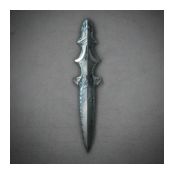

In [47]:
print("Loading sample image...")
image = cv2.imread(r"D:\invoke\outputs\000155.7a114e21.3509169609.png")
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.axis("off")
plt.show()


In [48]:
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)


In [50]:
def rank_mask(mask: dict):
    score = 0.0
    segmentation = mask["segmentation"]
    mid_x = segmentation.shape[0] / 2
    mid_y = segmentation.shape[1] / 2
    for i in range(segmentation.shape[0]):
        for j in range(segmentation.shape[1]):
            if segmentation[i][j]:
                score += (10 * mask["predicted_iou"]) / (
                    1 + ((i - mid_x) ** 2 + (j - mid_y) ** 2)
                )
    return score


masks.sort(key=rank_mask, reverse=True)


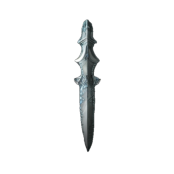

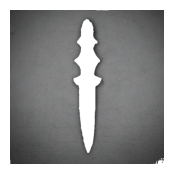

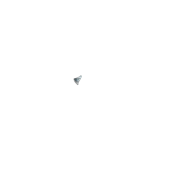

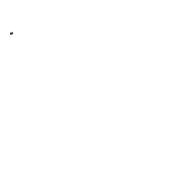

In [51]:
for mask in masks[0:5]:
    plt.figure(figsize=(2, 2))
    plt.axis("off")
    masked_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    masked_image[:, :, 3] = mask["segmentation"] * 0xFF
    plt.imshow(masked_image)
    plt.show()
